Jakub Markil <br>
Kaja Ratajczak

In [11]:
import aseegg as ag
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [17]:
plt.rcParams['figure.figsize'] = [12, 8]

In [58]:
literki: str = "litery_czas.csv"
adept: str = "ADEPT.txt"
bekon: str = "BEKON.txt"

freq: int = 200

pomiary: list[object] = [0, 0]

In [59]:
pomiary[0]: object = pd.read_csv(adept, header=0, names = ["uV", "time"])
pomiary[1]: object = pd.read_csv(bekon, header=0, names = ["uV", "time"])
litery: object = pd.read_csv(literki, header=0, names = ["char", "time"])

In [44]:
litery["char"][0]

'B'

In [4]:
len_a: int = len(pomiary[0])
time_a: list = np.linspace(0, pomiary[0]["time"][len_a-1] - pomiary[0]["time"][0], len_a)

In [5]:
len_b: int = len(pomiary[1])
time_b: list = np.linspace(0, pomiary[1]["time"][len_b-1] - pomiary[1]["time"][0], len_b)

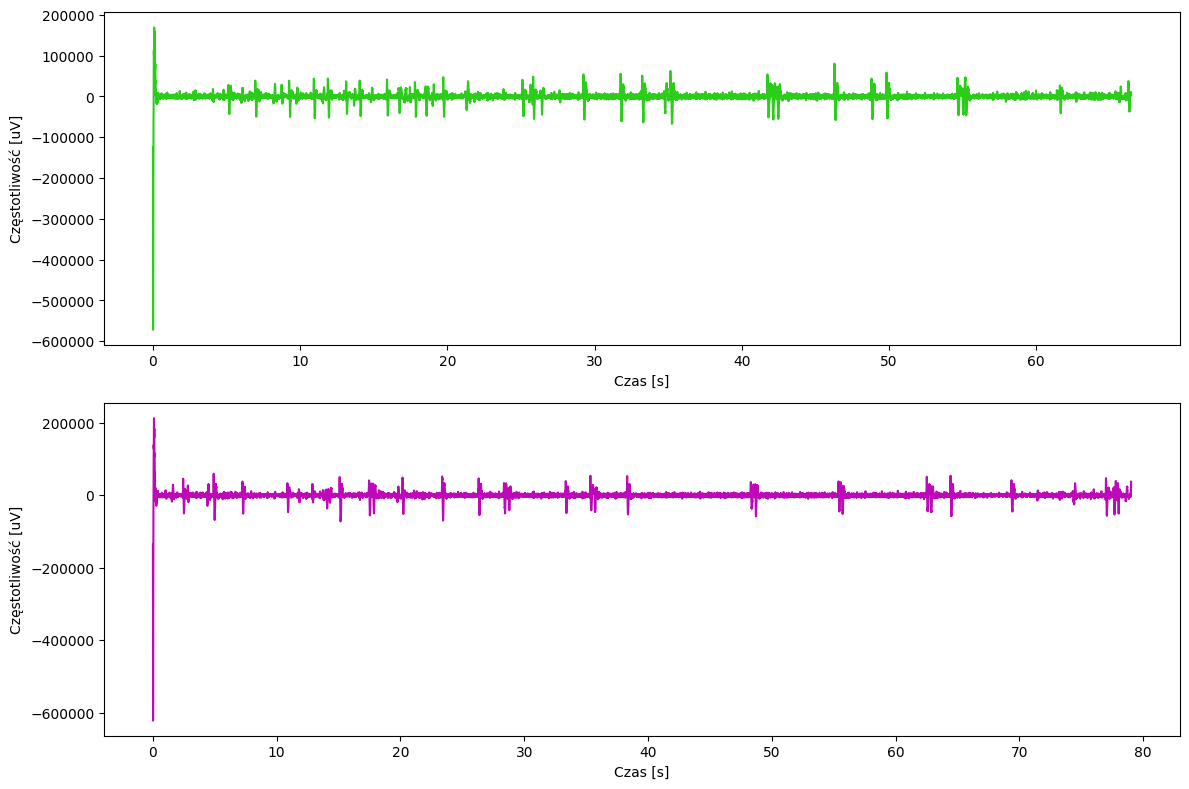

In [18]:
plt.subplot(2,1,1)
plt.plot(time_a, pomiary[0]["uV"], color="#2ccc1b")
plt.xlabel("Czas [s]")
plt.ylabel("Częstotliwość [uV]")
plt.subplot(2,1,2)
plt.plot(time_b, pomiary[1]["uV"], color="#bd09b7")
plt.xlabel("Czas [s]")
plt.ylabel("Częstotliwość [uV]")
plt.tight_layout()
plt.show()

In [8]:
filtr_a: list = ag.gornoprzepustowy(pomiary[0]["uV"], freq, 3)
filtr_a = ag.pasmowozaporowy(filtr_a, freq, 48, 52)
filtr_a = ag.pasmowoprzepustowy(filtr_a, freq, 1, 40)

In [9]:
filtr_b: list = ag.gornoprzepustowy(pomiary[1]["uV"], freq, 3)
filtr_b = ag.pasmowozaporowy(filtr_b, freq, 48, 52)
filtr_b = ag.pasmowoprzepustowy(filtr_b, freq, 1, 40)

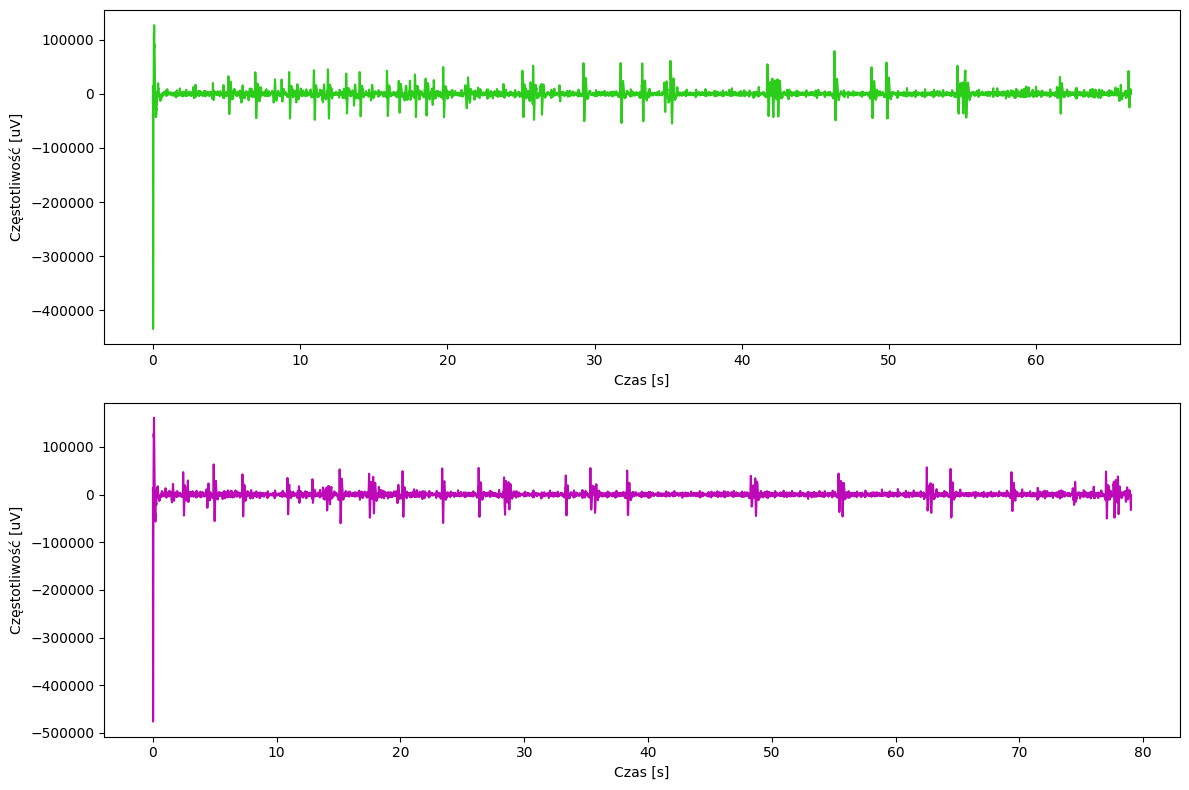

In [14]:
plt.subplot(2,1,1)
plt.plot(time_a, filtr_a, color="#2ccc1b")
plt.xlabel("Czas [s]")
plt.ylabel("Częstotliwość [uV]")
plt.subplot(2,1,2)
plt.plot(time_b, filtr_b, color="#bd09b7")
plt.xlabel("Czas [s]")
plt.ylabel("Częstotliwość [uV]")
plt.tight_layout()
plt.show()

In [80]:
id_a: list[int] = []

for i in range(1, len(filtr_a)):
    if filtr_a[i] > 24_050 and filtr_a[i-1] <= 22_000:
        id_a.append(pomiary[0]["time"][i])

In [79]:
wynik_a = '_'
for idx in id_a:
    for i in range(len(litery["time"])-1):
        if idx >= litery["time"][i]+0.2 and idx < litery["time"][i+1]+0.2 and litery["char"][i] != " " and wynik_a[-1] != litery["char"][i]:
            wynik_a += litery["char"][i]
            
wynik_a = wynik_a[1:]
wynik_a

'ADEPTB'

In [89]:
id_b: list[int] = []

for i in range(1, len(filtr_b)):
    if filtr_b[i] > 23_800 and filtr_b[i-1] <= 22_000:
        id_b.append(pomiary[1]["time"][i])

In [93]:
wynik_b = '_'
for idx in id_b:
    for i in range(len(litery["time"])-1):
        if idx >= litery["time"][i]+0.2 and idx < litery["time"][i+1]+0.2 and litery["char"][i] != " " and wynik_b[-1] != litery["char"][i]:
            wynik_b += litery["char"][i]
            
wynik_b = wynik_b[1:]
wynik_b

'BEKON'